

<center>

<h2>MINERIA DE DATOS</h2>
PROFESORA ELIZABETH LEON GUZMAN

Estudiante: Francisco Salamanca

 <br />
<strong>TEMA</strong> Agrupación
</center>

-------
Práctica correspondiente a Validación de la calidad del resultado de modelos de agrupación.
*   SSE
*   SSB
*   Silhouette Coeficient - Coeficiente de silueta
*   Davies-Bouldin index
*   Presicion - recall - F
*   Entropia-Pureza-MI
Ejemplo tomado de https://scikit-learn.org/, Trabajar Individualmente
--------

# Punto 1

Teniendo en cuenta los siguientes datos, responder:


In [4]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(
    n_samples=500,
    n_features=2,
    centers=4,
    cluster_std=1,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=1,
)  # For reproducibility


For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.561464362648773
For n_clusters = 6 The average silhouette_score is : 0.4857596147013469


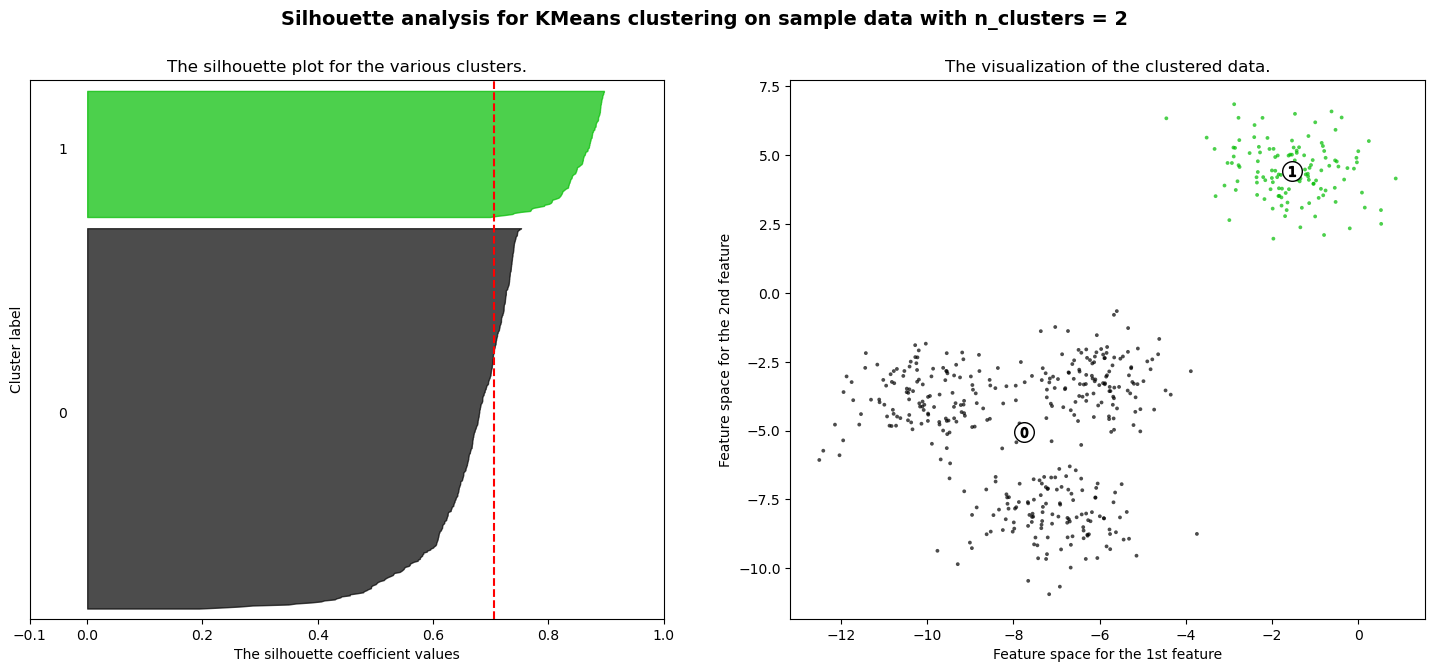

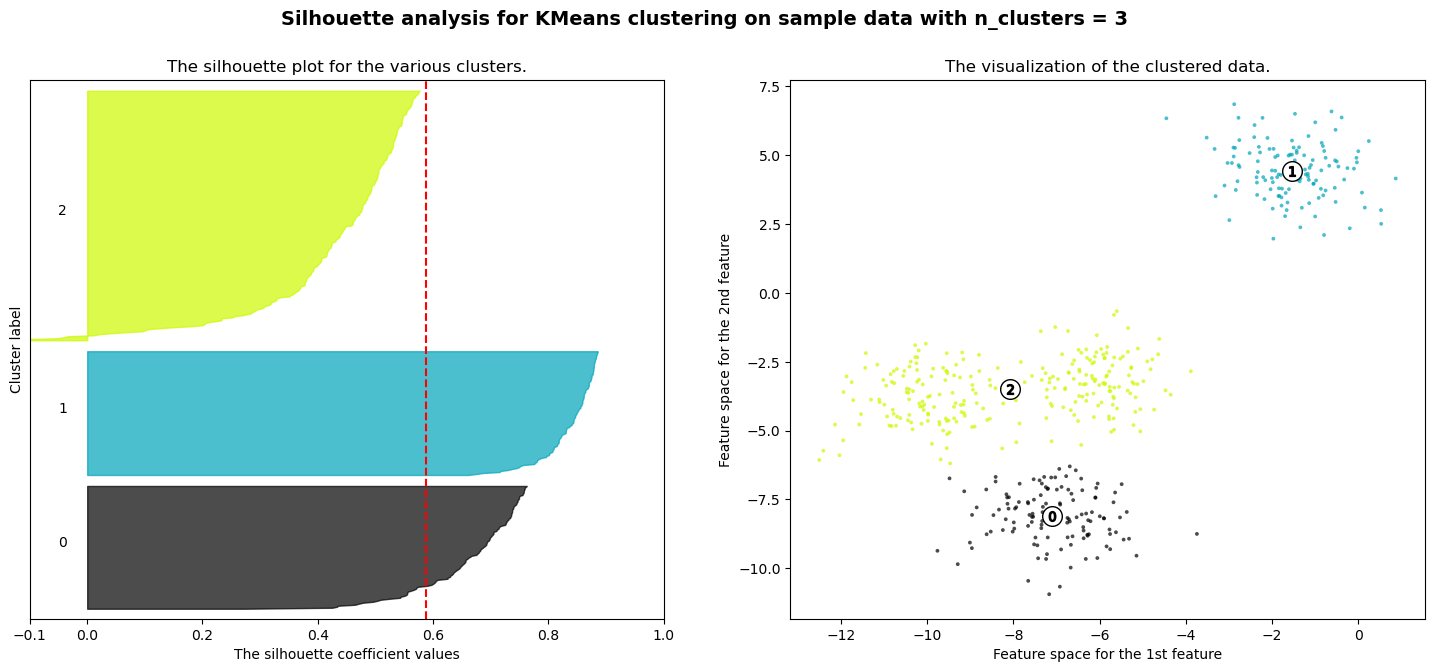

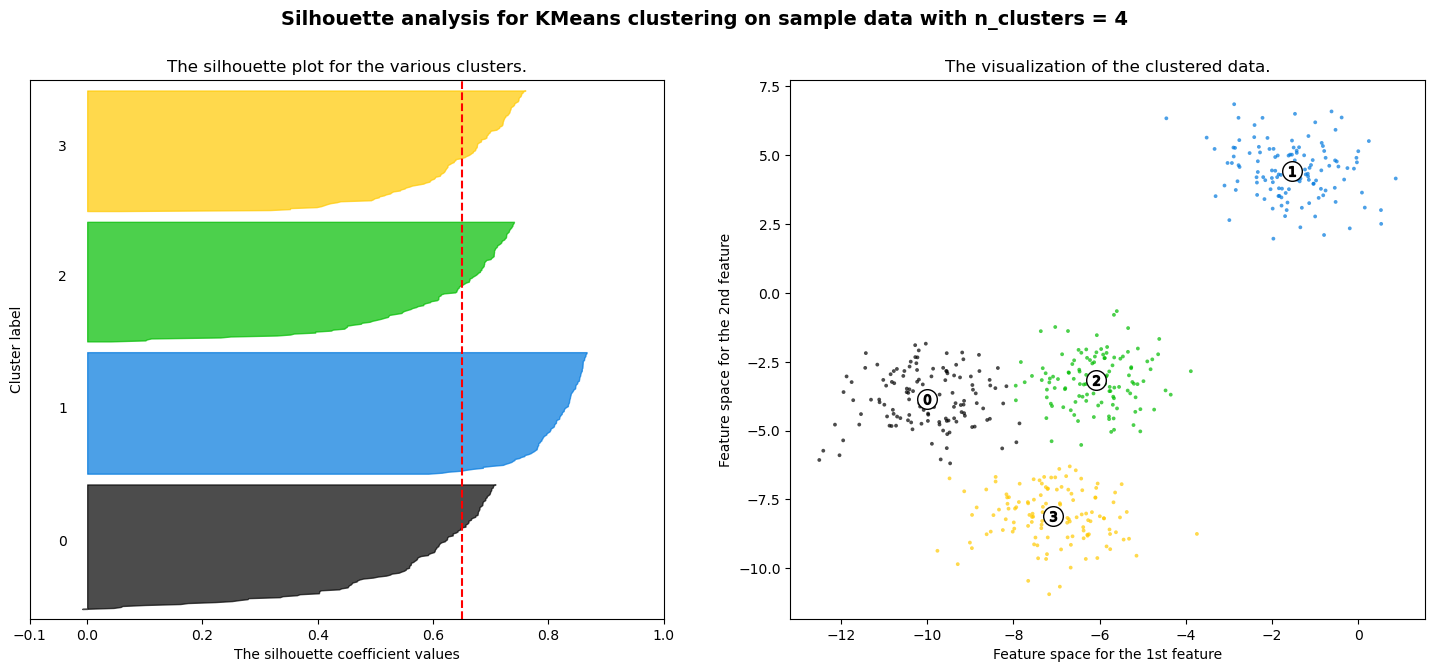

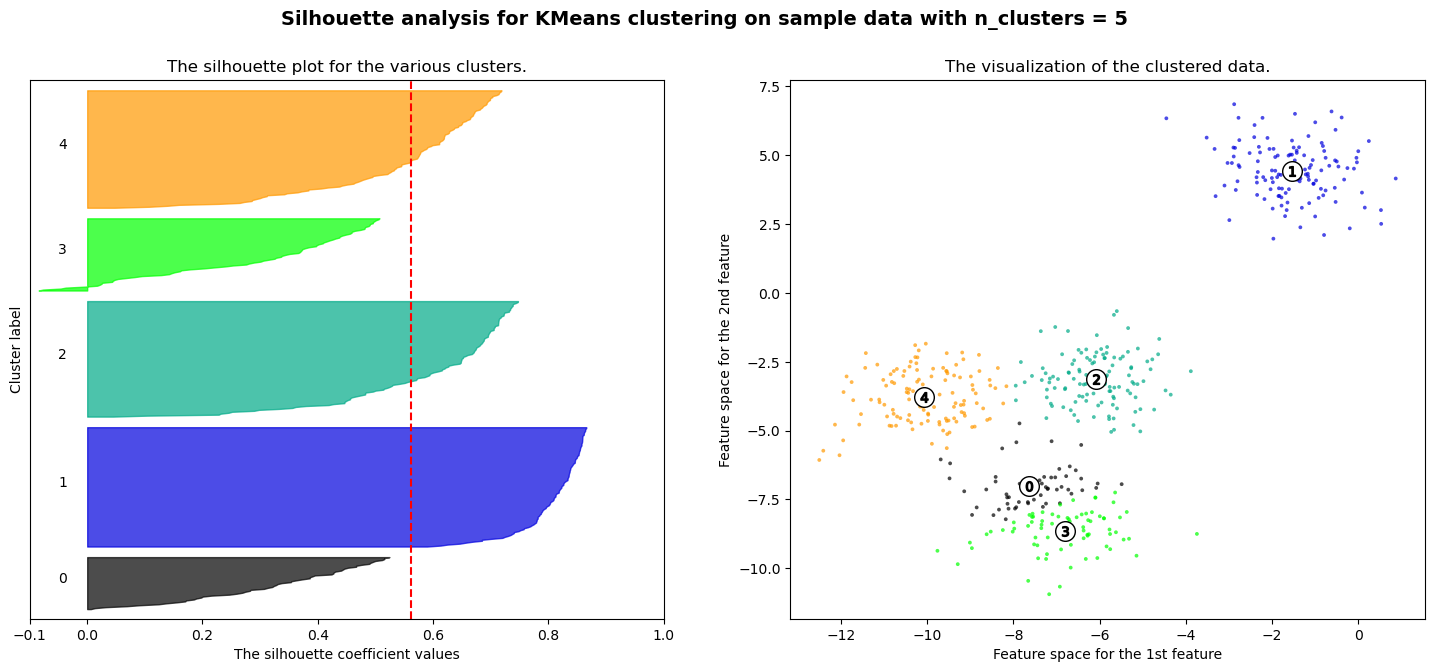

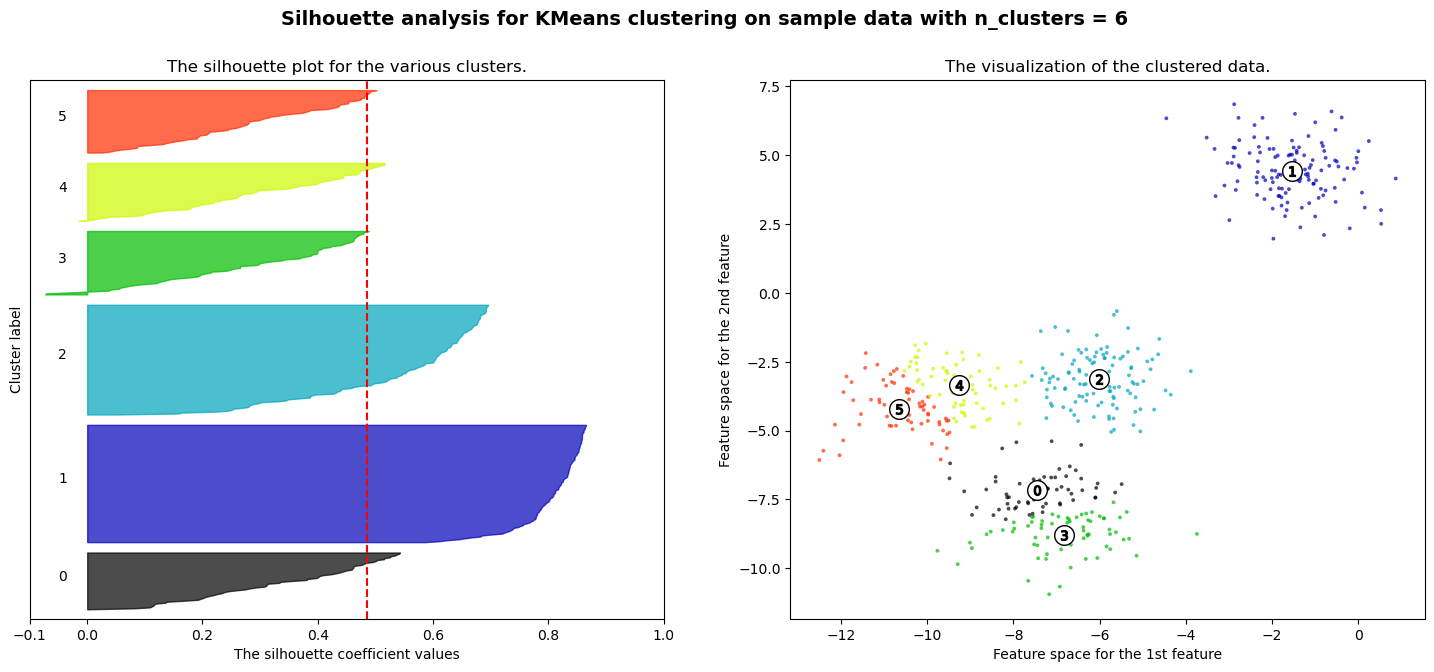

In [3]:
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    #COmpute the silhouette avg
    silhouette_avg = silhouette_score(X, cluster_labels)
    print( "For n_clusters =", n_clusters, "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

## Analice los reultados y concluya


Se realizaron seis pruebas de agrupamiento sobre un conjunto de datos aleatorio, variando el número de clústeres desde 2 hasta 6. Para evaluar el desempeño de cada configuración, se aplicó un análisis de silueta, para poder estimar la calidad de la separación y cohesión de los clústeres obtenidos.

- Para 2 clusters:

Se generaron dos clústeres, etiquetados como 0 y 1. El clúster 0 contiene una mayor cantidad de datos en comparación con el clúster 1; sin embargo, presenta una menor cohesión interna. Esto se evidencia en la gráfica de silueta, donde varios puntos del clúster 0 no alcanzan el umbral promedio, indicando cierta dispersión.

Para esta configuración de dos clústeres, el puntaje promedio del coeficiente de silueta fue de **0.7049**, lo cual sugiere una buena calidad de agrupamiento. Este valor indica que, en general, los puntos están bien asignados a sus respectivos clústeres.

Recordando la interpretación del coeficiente de silueta:

s(i)≈1: el punto está muy bien agrupado.

s(i)≈0: el punto se encuentra en el límite entre dos clústeres.

s(i)<0: el punto podría estar mal asignado al clúster.

- Para 3 clusters:

Para 3 clusteres el puntaje promedio del coeficiente de silueta se redujo a un promedio de **0.5882**, esto puede ser explicado en la generacion de los clusteres 2 y 0, los cuales presentan poca separación, y en la grafica silueta se obserban puntos con valores de coeficiente menores a 0, por lo cual esta indicando que el punto podría estar mal asignado.


- Para 4 clusters:

Para 4 clusteres el puntaje promedio del coeficiente de silueta se incremento con respecto a 3 clusters con un promedio de **0.6505**, se presentan clusteres homogeneos, con un promedio de datos por cluster similar. 


- Para 5 clusters:

Para 5 clusteres el puntaje promedio del coeficiente de silueta se redujo con respecto a los otros clusters con un promedio de **0.5614**, explicandose por la creacion de los grupos 0 y 3, los cuales estan demasiado cohesionados 


- Para 6 clusters:

Para 6 clusteres el coeficiente de silueta es de **0.4857**, siendo este el menor coeficiente entre todos, explicandose por la cohesion entre los clusters 0-3, 4-5


Finalmente, se podria decir que, la mejor clusterización fue dada por **2 clusters** y por **4 clusters** 


## Calcule el índice Davies_Bouldin para el mismo conjunto de datos. Compare con el coeficiente de silueta


In [ ]:
# El indice de DBI se calcula mediante la dispersion interna y separacion entre los clusters.
# Un valor cercano a 0 indica que los clusters son compactos y bien separados, mientras que un valor alto indica que los clusters son difusos o se superponen.

from sklearn.metrics import davies_bouldin_score

# 3. Calcular índice Davies-Bouldin
for n_clusters in range_n_clusters:
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    
    #Compute the Davies-Bouldin index
    dbi= davies_bouldin_score(X, cluster_labels)
    print( "For n_clusters =", n_clusters, "The average dbi is :",
        dbi,
    )


For n_clusters = 2 The average dbi is : 0.3609241522988115
For n_clusters = 3 The average dbi is : 0.6023307623599995
For n_clusters = 4 The average dbi is : 0.4776988389567712
For n_clusters = 5 The average dbi is : 0.73929217033879
For n_clusters = 6 The average dbi is : 0.9481890885042579


Los resultados obtenidos son similares, a diferencia que en el indice Davies Bouldin el mejor clusterer es aquel con un indice cercano a 0.
De la misma manera los mejores clusterers siguen siendo aquel de 2 y el de 4

## Calcule el SSE y y grafique el codo. Segun el codo ¿Cuál es el mejor número de clusters? Compare con los resultados de Davis_Bouldin y Coeficiente silutea

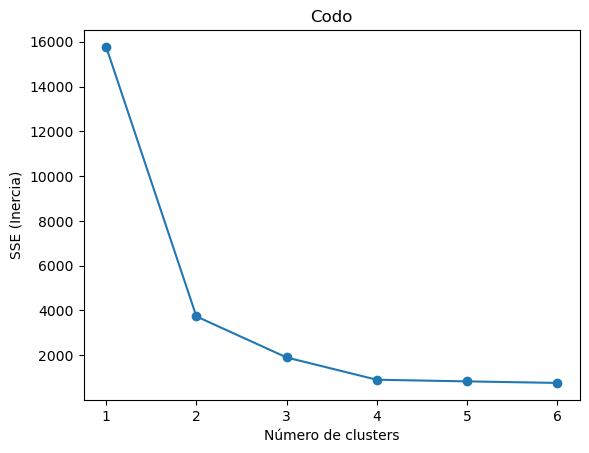

In [11]:
# medida para ver compacidad de los clusters, entre mas bajo el valor, mejor la compacidad

sse = []
range_n_clusters = range(1, 7)

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)  # X es tu dataset
    sse.append(kmeans.inertia_)  # inertia_ es el SSE

# Opcional: visualizar con el método del codo
plt.plot(range_n_clusters, sse, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('SSE (Inercia)')
plt.title('Codo')
plt.show()


Usando la metrica de SSE, el mejor número de clusters seria el 6, ya que presenta un índice mas bajo y por lo tanto grupos mas compactos.
Sin embargo esto no es constante con las otras dos metricas que indican que entre más clusters, el valor es peor.

El mejor numero de clusters teniendo en cuenta el SSE y los coeficientes DB y silueta seria de 2, garantizando clusters compactos y con una separacion considerable.

# Punto 2

## Cargar el conjunto de datos Iris y quitarle la etiqueta.

In [18]:
from sklearn.datasets import load_iris

# Cargar datos
iris = load_iris()

# Datos (matriz de características)
X2 = iris.data

# Etiquetas verdaderas (opcional, para comparar)
y2 = iris.target

## Aplicar K-means con k= 2,3,4,5 y 6.

For n_clusters = 2 The average silhouette_score is : 0.6810461692117462
For n_clusters = 3 The average silhouette_score is : 0.5511916046195919
For n_clusters = 4 The average silhouette_score is : 0.49535632852884987
For n_clusters = 5 The average silhouette_score is : 0.4898982472843943
For n_clusters = 6 The average silhouette_score is : 0.47506295195987086


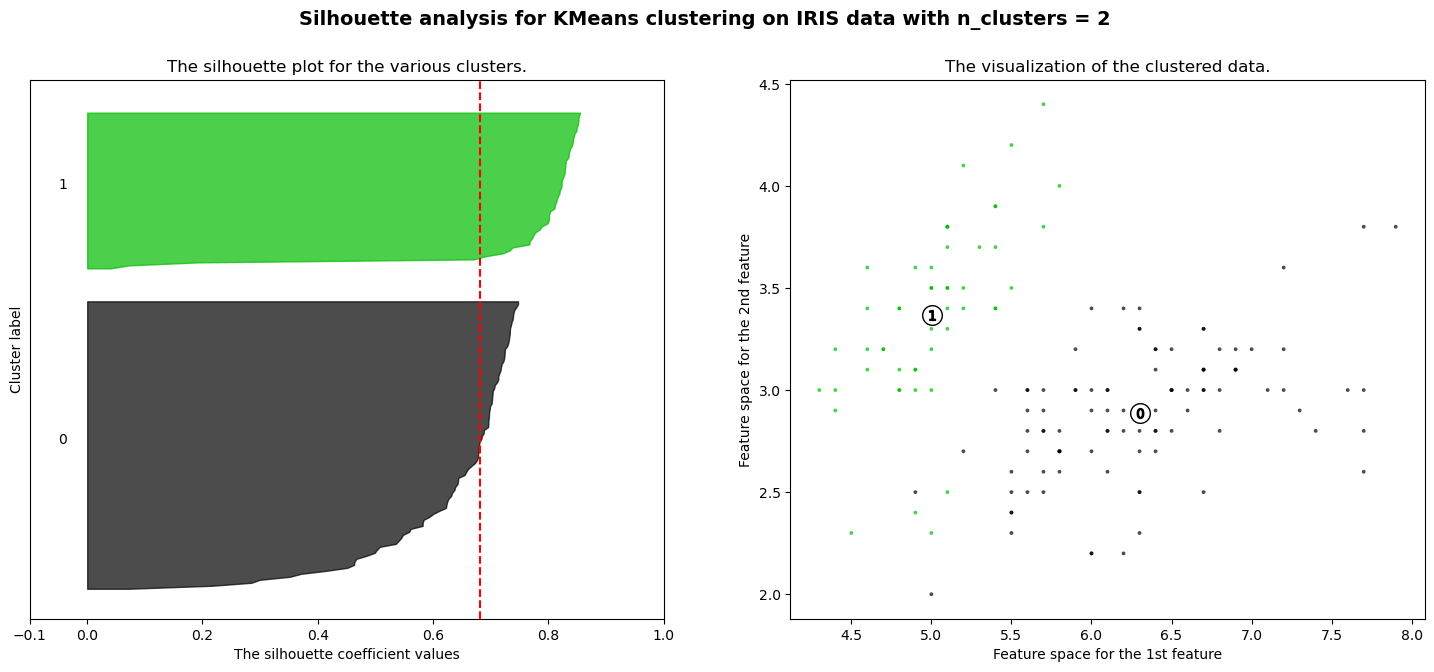

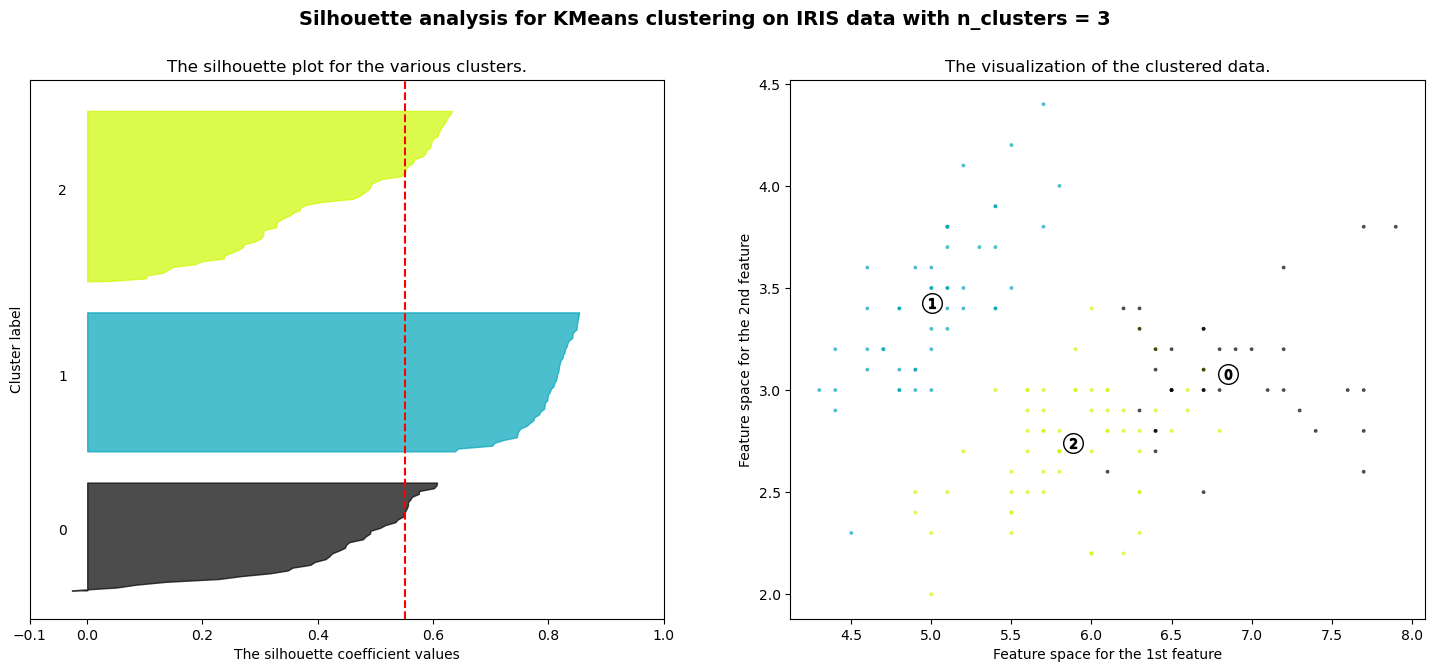

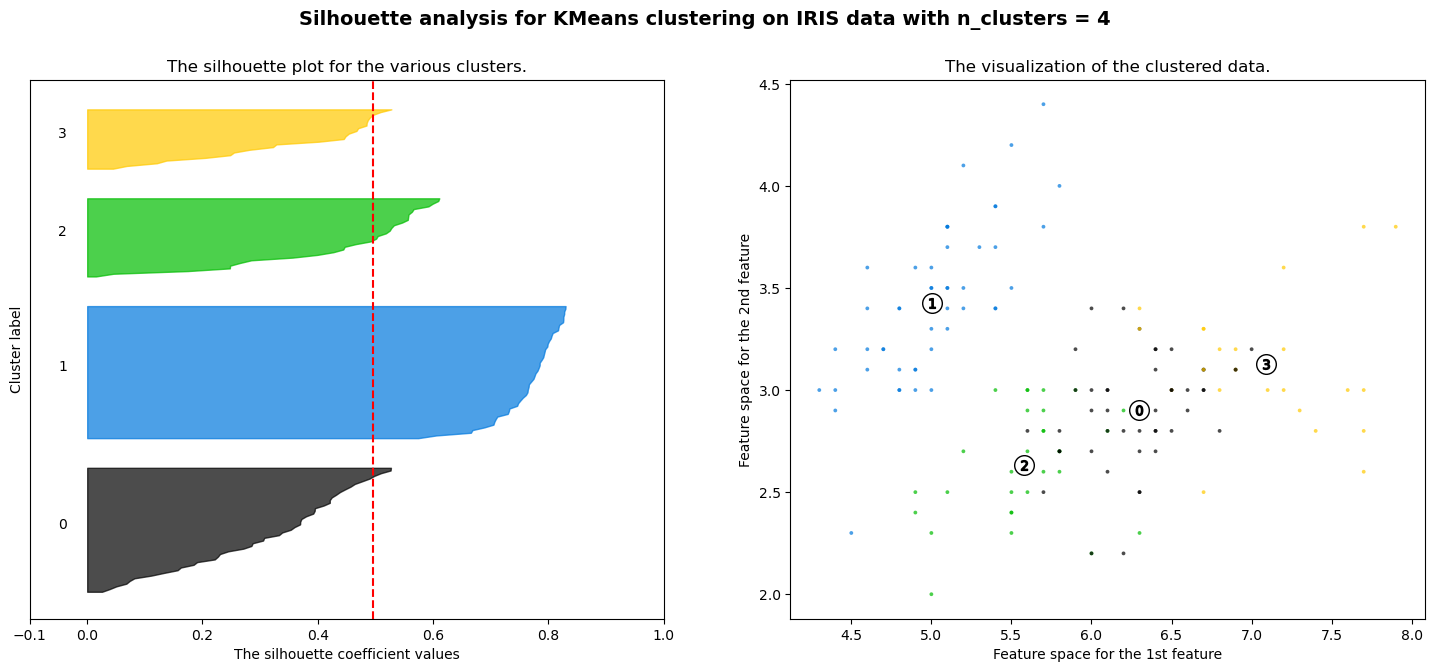

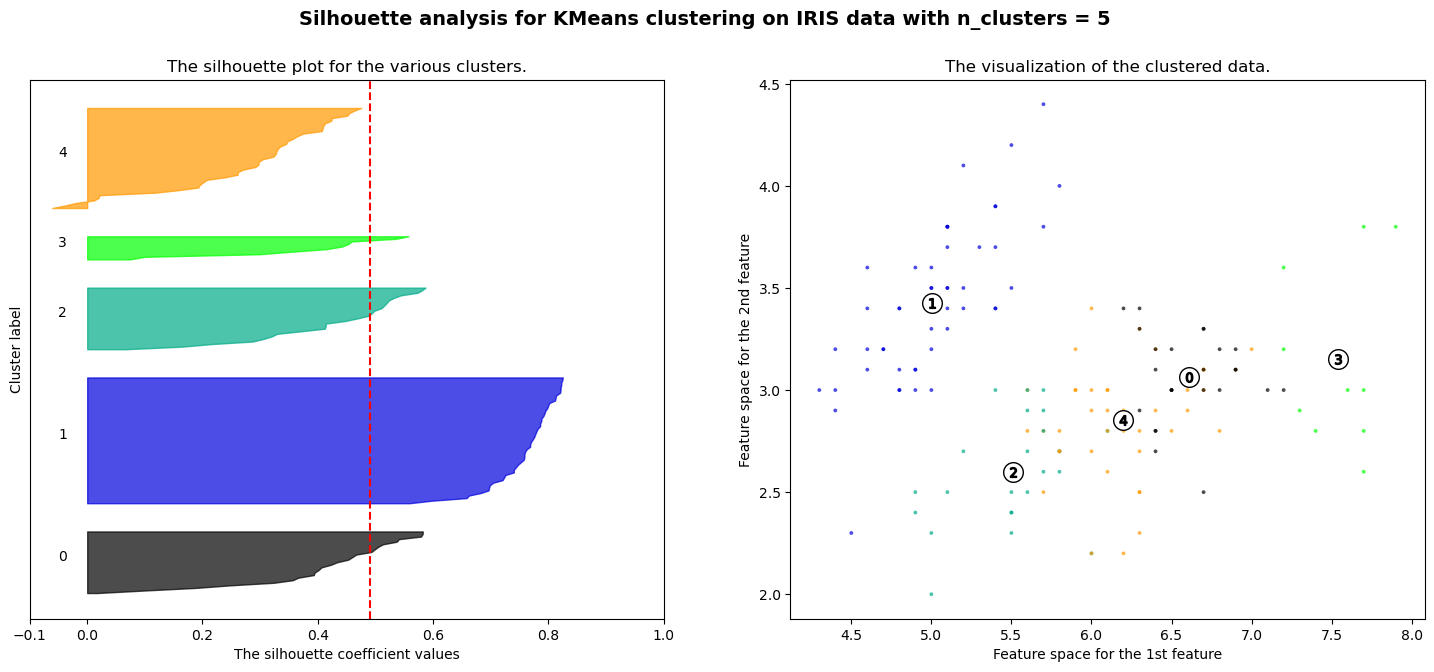

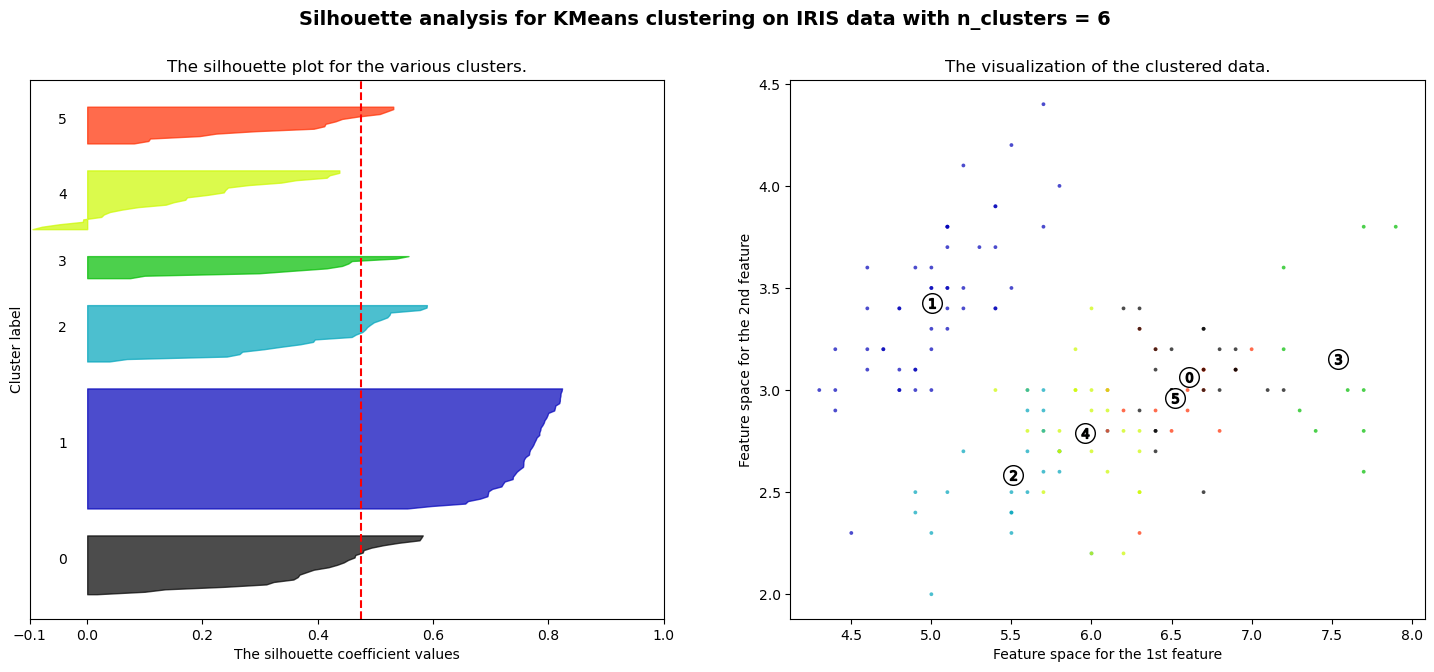

In [ ]:
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X2) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X2)

    #COmpute the silhouette avg
    silhouette_avg = silhouette_score(X2, cluster_labels)
    print( "For n_clusters =", n_clusters, "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X2, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X2[:, 0], X2[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on IRIS data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

## Validar con los indices SSE, Coeficiente de Silhouette y Davies_Bouldin

In [15]:
# DAVIES_BOULDIN INDEX

# 3. Calcular índice Davies-Bouldin
for n_clusters in range_n_clusters:
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X2)
    
    #Compute the Davies-Bouldin index
    dbi= davies_bouldin_score(X2, cluster_labels)
    print( "For n_clusters =", n_clusters, "The average dbi is :",
        dbi,
    )


For n_clusters = 2 The average dbi is : 0.4042928371730435
For n_clusters = 3 The average dbi is : 0.6660385791628457
For n_clusters = 4 The average dbi is : 0.763894658536336
For n_clusters = 5 The average dbi is : 0.7982494915660882
For n_clusters = 6 The average dbi is : 0.9188685546116716


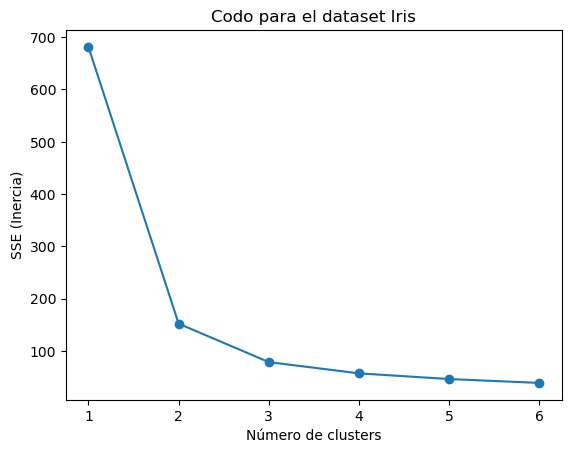

In [16]:
# SSE (Suma de Errores Cuadráticos) para el dataset Iris
sse = []
range_n_clusters = range(1, 7)
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X2)  # X2 es tu dataset Iris
    sse.append(kmeans.inertia_)  # inertia_ es el SSE
# Opcional: visualizar con el método del codo
plt.plot(range_n_clusters, sse, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('SSE (Inercia)')
plt.title('Codo para el dataset Iris')
plt.show()

Para IRIS el mejor número de clusters es de 2, segun SSE, DB y silueta

## Validar con medidas externas: Precisión, recall, F1, MI, y una de Entropia o Pureza.

- Precisión indica qué tan correcto es el cluster asignado
- Recall	indica qué tan bien se detectan las clases verdaderas
- F1-score indica la media armónica entre precisión y recall
- Mutual Information (MI) indica la información compartida entre clusters y clases reales
- Entropía o Pureza mide mezcla o limpieza de clases por clúster, 

In [19]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import adjusted_mutual_info_score, confusion_matrix

def purity_score(y_true, y_pred):
    # Calcular la matriz de confusión
    matrix = confusion_matrix(y_true, y_pred)
    # Sumar el máximo de cada columna y dividir por el total de muestras
    return np.sum(np.amax(matrix, axis=0)) / np.sum(matrix)

print("Validación externa (Precisión, Recall, F1, MI, Pureza):")
for n_clusters in [2, 3, 4, 5, 6]:
    kmeans = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = kmeans.fit_predict(X2)
    
    # Relabel clusters to best match true labels (para métricas de clasificación)
    # Usar la matriz de confusión para mapear clusters a clases verdaderas
    from scipy.stats import mode
    labels = np.zeros_like(cluster_labels)
    for i in range(n_clusters):
        mask = (cluster_labels == i)
        if np.any(mask):
            labels[mask] = mode(y2[mask], keepdims=True)[0]
    
    precision = precision_score(y2, labels, average='macro')
    recall = recall_score(y2, labels, average='macro')
    f1 = f1_score(y2, labels, average='macro')
    mi = adjusted_mutual_info_score(y2, cluster_labels)
    pureza = purity_score(y2, cluster_labels)
    
    print(f"\nClusters: {n_clusters}")
    print(f"Precisión: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1-score: {f1:.3f}")
    print(f"Mutual Info (MI): {mi:.3f}")
    print(f"Pureza: {pureza:.3f}")



Validación externa (Precisión, Recall, F1, MI, Pureza):

Clusters: 2
Precisión: 0.486
Recall: 0.667
F1-score: 0.550
Mutual Info (MI): 0.654
Pureza: 0.667

Clusters: 3
Precisión: 0.898
Recall: 0.887
F1-score: 0.885
Mutual Info (MI): 0.739
Pureza: 0.887

Clusters: 4
Precisión: 0.889
Recall: 0.853
F1-score: 0.847
Mutual Info (MI): 0.695
Pureza: 0.853

Clusters: 5
Precisión: 0.923
Recall: 0.900
F1-score: 0.898
Mutual Info (MI): 0.685
Pureza: 0.900

Clusters: 6
Precisión: 0.931
Recall: 0.920
F1-score: 0.919
Mutual Info (MI): 0.682
Pureza: 0.920


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Priorizando metricas externas, k=5 es el que mejor se comporta. sin embargo iris solo tiene 3 clases, por lo que el modelo con 5 grupos seguramente esta sobreajustado, ya que esta subdividiendo clases reales. 

Por lo que la mas fiel a la realidad seria k=3